# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

Build a regression model to predict user churn based on a variety of variables.

Build a binomial logistic regression model and prepare an executive summary to share your results.



# **Regression modeling**

Build a binomial logistic regression model. Logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>



# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as pt

# Packages for Logistic Regression & Confusion Matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset by running this cell
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a binomial logistic regression model?

The proper role of exploratory data analysis is a subtle issue. I wouldn't say that it is "necessary" to perform EDA before fitting a logistic regression model. You could conduct exploratory analyses if that is the point of your endeavor. On the other hand, if your goal is to test a hypothesis (say a treatment effect), exploring your data first to determine the optimal way to do it puts your thumb on the scale: you could end up with inflated type I error rates and poor out of sample performance.
<br>
Before applying any Machine Learning model, some variables might need to be transformed and converted to numerical data type to be fitted into the model. Moreover, data needs to be cleaned, observed before passing it to the model in order to achieve better and accurate models
</br>

In [3]:
def skeweness(column):
       mean=np.mean(df[column])
       median=np.median(df[column])
       print("The mean: ",mean)
       #calculating the median
       print("The median: ",median)
       if mean>median:
         print('The data more likely to be skewed to the RIGHT!')
       else:
         print('The data more likely to be skewed to the LEFT!')

def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    fig, ax = pt.subplots(figsize=(5, 5))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    pt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    pt.title(f'{column_str} histogram');


def boxplotter(column,xlabel,title): # Box plot
      fig, ax = pt.subplots(figsize=(5, 5))
      box = sns.boxplot(x=df[column])
      g = pt.gca()
      #box.set_xticklabels(np.array([readable_numbers(x) for x in g. 􏰀→get_xticks()]))
      pt.xlabel(xlabel)
      pt.title(title)
      pt.show()

### **Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



### Discover

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


There are only two catogorical variable: (label: churn-retained, device: iphone-android)

In [6]:
print("Number of rows: ",df.shape[0],"Number of columns: ",df.shape[1])

Number of rows:  14999 Number of columns:  13


In [7]:
#Dropping the ID column
df.drop('ID',axis=1,inplace=True)

In [8]:
features=list(df.columns)
features

['label',
 'sessions',
 'drives',
 'total_sessions',
 'n_days_after_onboarding',
 'total_navigations_fav1',
 'total_navigations_fav2',
 'driven_km_drives',
 'duration_minutes_drives',
 'activity_days',
 'driving_days',
 'device']

### Checking Missing Values

In [9]:
df.isnull().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [10]:
print('Total missing values: ',df.isnull().sum().sum())

Total missing values:  700


In [11]:
for f in features: 
    if (df[f].isnull().sum()>0):
        print("The ",f, 'Column has missing values')

The  label Column has missing values


### Duplicates 

In [12]:
print('Total duplicates= ',df.duplicated().sum())

Total duplicates=  0


### Statistical summary

In [13]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


There are variables that might have outliers just by assessing at the quartile values, standard deviation, and max values, The 75% values in sessions variable for example is 112, but its maximum value is 743

## Exploratory Data Analysis

Exploring each column in the dataset

### label

In [14]:
df['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

In [15]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

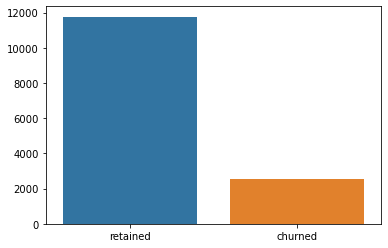

In [16]:
#bar plot
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts().values)

### sessions: number of time users open the app

In [17]:
df['sessions'].head()

0    283
1    133
2    114
3     49
4     84
Name: sessions, dtype: int64

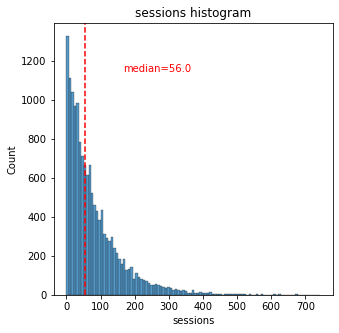

In [18]:
#its distribution
histogrammer('sessions', median_text=True)

In [19]:
#how many users churned and have 0 sessions in the past month?
df_churn=df[(df['label']=='churn') & (df['sessions']==0)]

In [20]:
df_churn.shape

(0, 12)

This is an indicate that users not entering the app the past month at all did not churn

In [21]:
df_ret=df[(df['label']=='retained') & (df['sessions']==0)]
df_ret.shape

(87, 12)

In [22]:
df_ret.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
25,retained,0,0,139.194969,2731,13,4,5702.339466,4582.737478,6,2,Android
97,retained,0,0,559.547112,2879,0,0,6668.844350,3511.370419,28,24,Android
217,retained,0,0,33.710210,629,160,0,6103.881670,1767.846528,8,2,iPhone
339,retained,0,0,0.220211,347,130,0,2520.850896,1539.318152,20,15,iPhone
831,retained,0,0,238.286544,3179,0,0,1996.552690,636.451699,18,10,Android


In [23]:
#average session per label
(df.groupby('label').mean('sessions'))

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,87.238959,72.730678,196.893424,1471.027603,139.414826,31.596609,4147.171864,1975.459630,9.644716,7.218060
retained,79.197654,66.075491,187.963672,1812.359432,117.938451,29.216101,4022.245150,1840.213146,16.816628,13.252827


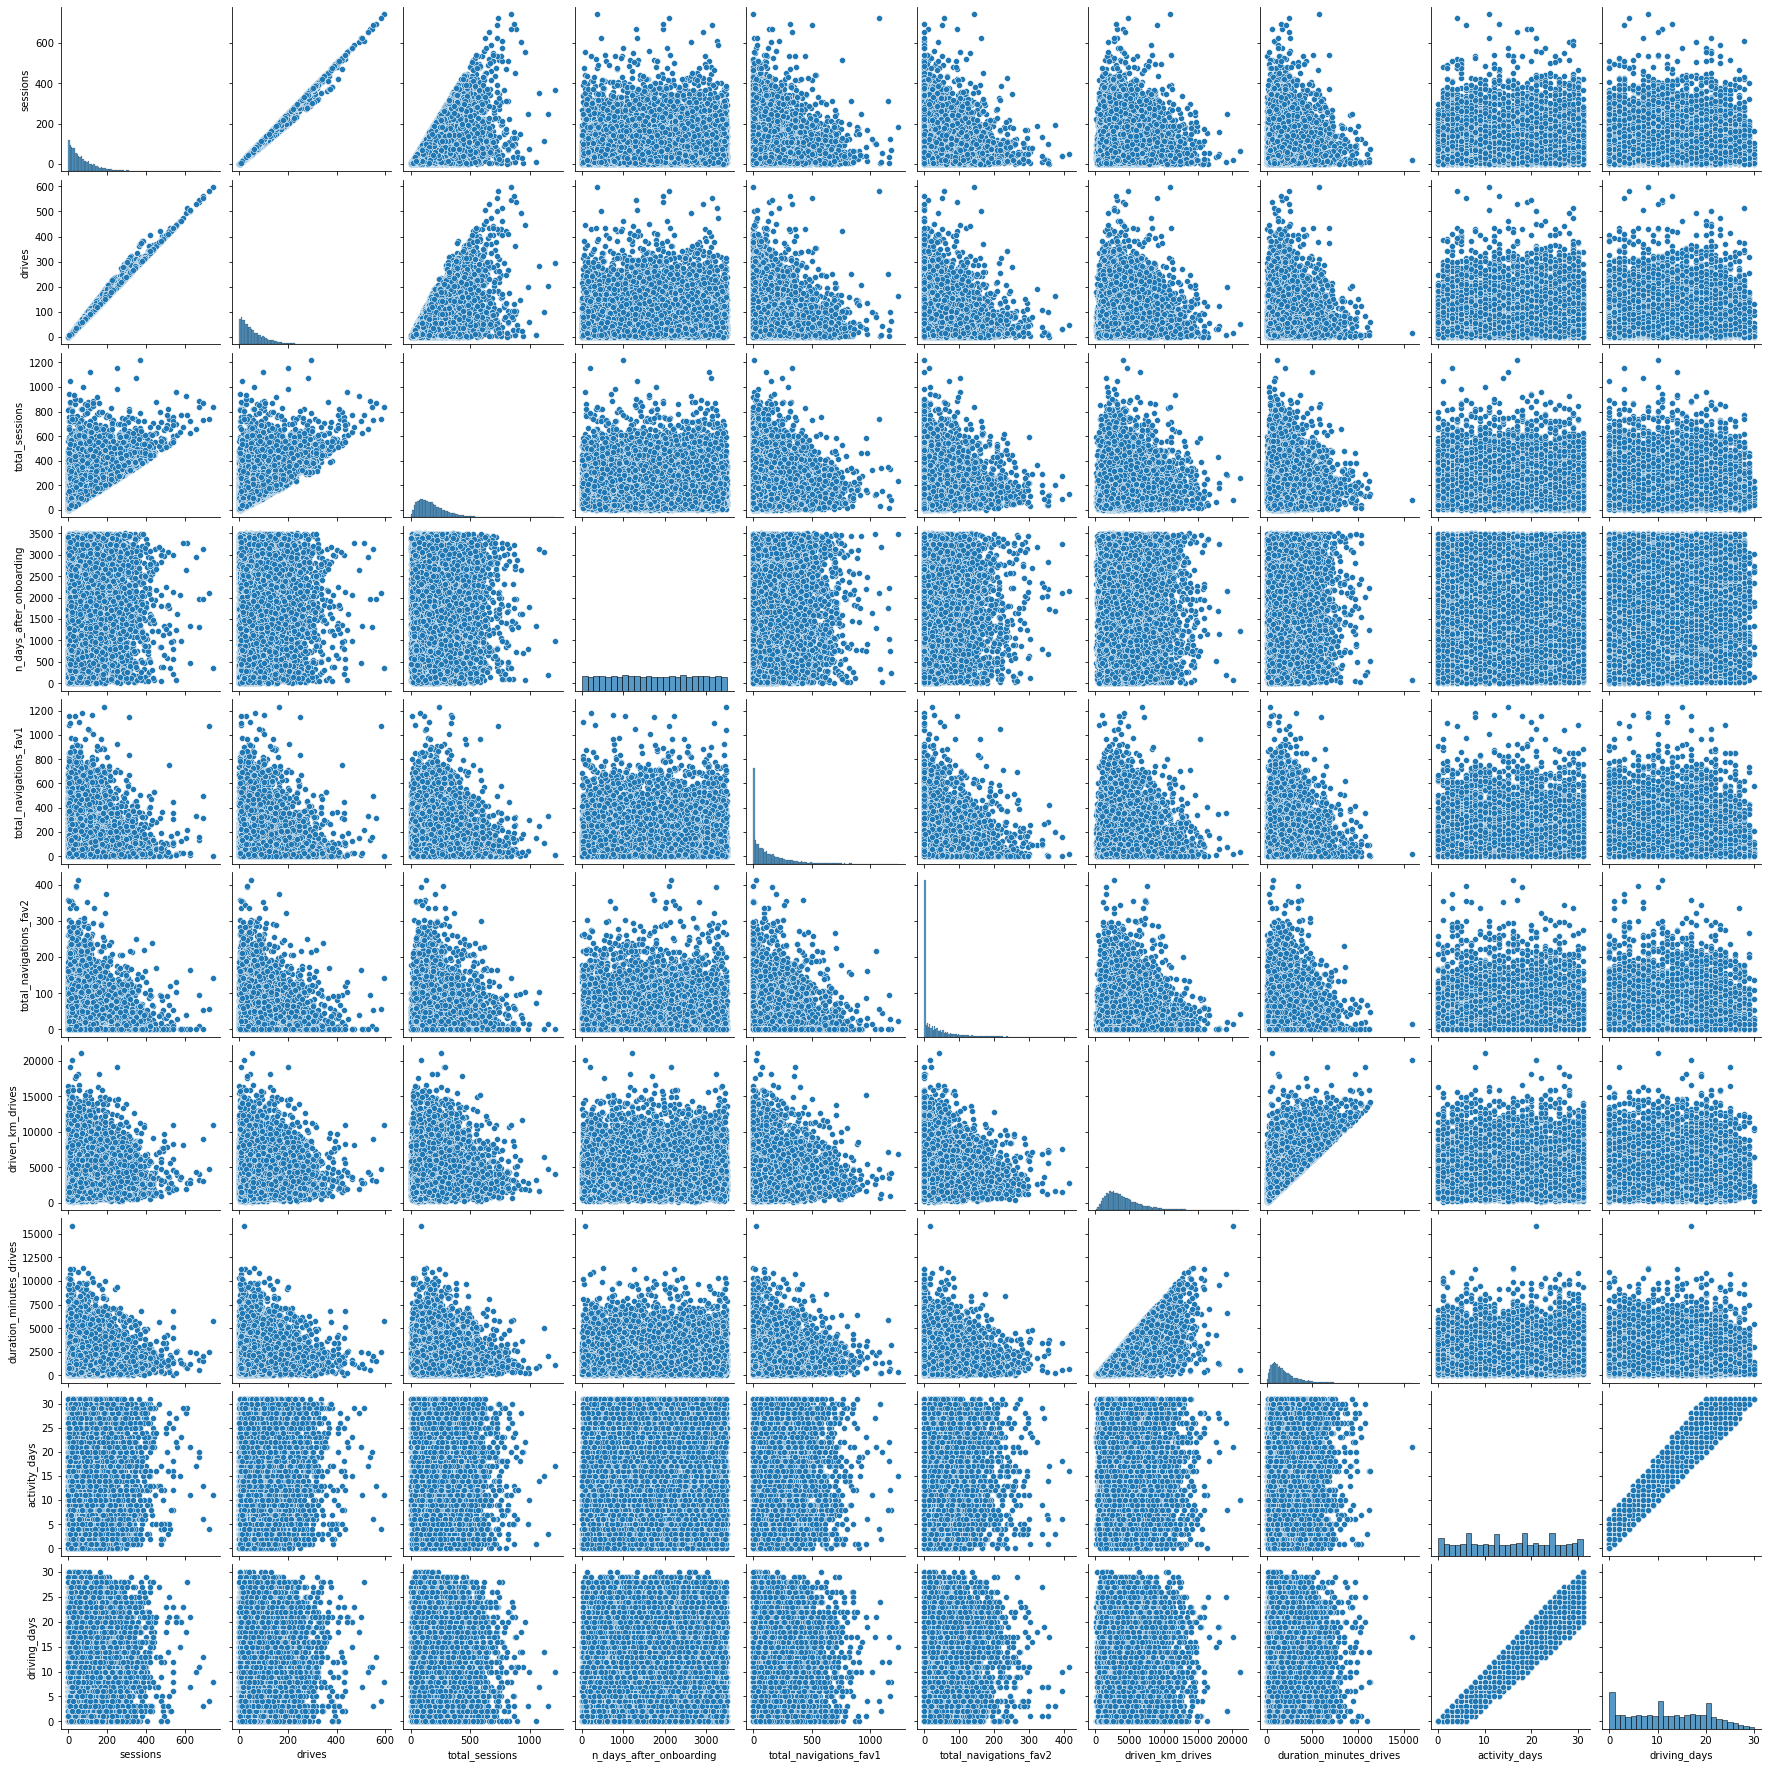

In [24]:
g = sns.pairplot(df)

pt.show(g)

From the above pair graphs, some independent variables have linear relation, for example the drives and sessions variable

## Hypothesis Testing

In [25]:
from scipy import stats
import statsmodels.api as sm

### Testing whether the number of sessions for a user have relation with user churn/retained

The label has only 2 groups, thus we are using the t-test

I want to know if the average sessions is the same for both churned and retained users or not!!

In [26]:
map_dictionary = {'churned': 1, 'retained': 2}
df['label_new'] = df['label'].map(map_dictionary)
df[['label','label_new']].head()

,label,label_new
0,retained,2.0
1,retained,2.0
2,retained,2.0
3,retained,2.0
4,retained,2.0


In [27]:
# 1. Isolate the `sessions` column for churn users.
churn_df=df[df['label_new']==1]['sessions']

# 2. Isolate the `sessions` column for retained users.
retained_df=df[df['label_new']==2]['sessions']
# 3. Perform the t-test
stats.ttest_ind(a=churn_df, b=retained_df, equal_var=False)


Ttest_indResult(statistic=4.231681002800661, pvalue=2.3797277605672346e-05)

Based on the p-value we got above which is 2.38, for our 5% significance level, since the p-value (2.38) is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean sessions of users between the two data groups (churned, retained) is different.

In [28]:
#The average number of sessions per label type:
df_grouped=df.groupby('label').mean('sessions')
df_grouped['sessions']

label
churned     87.238959
retained    79.197654
Name: sessions, dtype: float64

### **Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [29]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [30]:
# 1. Convert infinite values to zero
df['km_per_driving_day'].replace([np.inf, -np.inf], 0, inplace=True)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

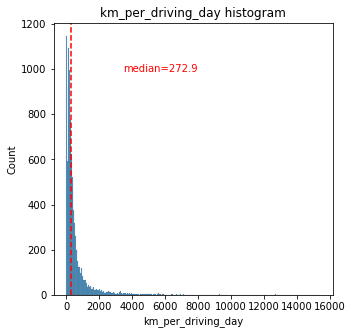

In [31]:
histogrammer('km_per_driving_day',True)

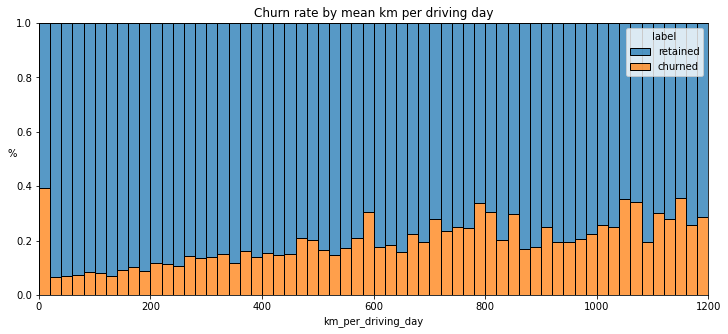

In [32]:
# Histogram
pt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20), #this is to specify the range to get only users drove at most 1200 km
             hue='label',
             multiple='fill')
pt.ylabel('%', rotation=0)
pt.title('Churn rate by mean km per driving day');

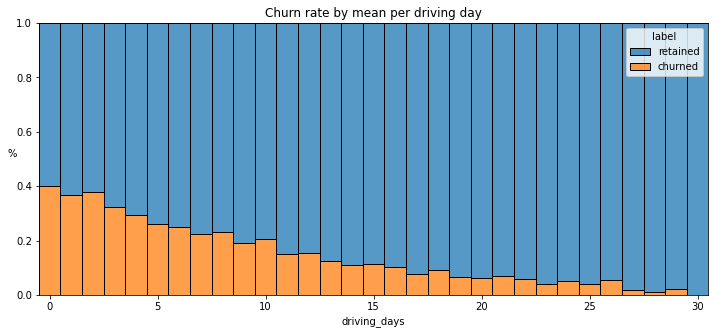

In [33]:
# Histogram
pt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32), #this is to specify the range to get only users drove at most 1200 km
             hue='label',
             multiple='fill',
             discrete=True)
pt.ylabel('%', rotation=0)
pt.title('Churn rate by mean per driving day');

As users drive more days, churn rate decrease significantly 

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [34]:
# Create `professional_driver` column
#this column take only 2 values, 0 or 1
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

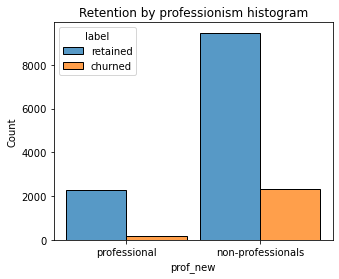

In [35]:
# Histogram
map_dictionary = {0: 'non-professionals', 1: 'professional'}
df['prof_new'] = df['professional_driver'].map(map_dictionary)
#df['prof_new']

pt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='prof_new',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
pt.title('Retention by professionism histogram');

In [36]:
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.



* Why did you select the X variables you did?

### **Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  label_new                14299 non-null  float64
 13  km_per_driving_day       14999 non-null  float64
 14  professional_driver   

In [38]:
#dropping columns
df.drop(['prof_new','label_new'],axis=1,inplace=True)

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [39]:
#missing values
df.isnull().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
km_per_driving_day           0
professional_driver          0
dtype: int64

In [40]:
#Dropping null values:
#dropping by rows: axis=0
df.dropna(axis=0, how="any", inplace=True)

In [41]:
print("Number of missing values: ",df.isnull().sum().sum())

Number of missing values:  0


#### **Impute outliers**



Outliers can be changed to the **median, mean, 95th percentile, etc.**

Seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [42]:
# Impute outliers
def prec95(column):
    # Calculate 75th percentile of annual strikes
    percentile95 = df[column].quantile(0.95)
    df.loc[ df[column] >percentile95, column] = percentile95
prec95('sessions')
prec95('drives')
prec95('total_sessions')
prec95('driven_km_drives')
prec95('duration_minutes_drives')

In [43]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,121.747395,29.638296,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,147.713428,45.350890,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,1236.000000,415.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.



In [44]:
# Create binary `label2` column
df['label2'] = np.where((df['label'] =='churned'), 1, 0)

### **Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.


#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [45]:
# Generate a correlation matrix
df.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.002982,0.004513,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.002286,0.006165,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000863,0.007780,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.004536,-0.006433,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.002982,0.002286,0.000863,-0.004536,1.000000,0.003734,-0.006481,0.007306,0.010318,0.010024,-0.000171,0.001257,0.055537
total_navigations_fav2,0.004513,0.006165,0.007780,-0.006433,0.003734,1.000000,0.004003,-0.004345,-0.004836,0.000938,0.008992,0.003535,0.020051
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.006481,0.004003,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.007306,-0.004345,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010318,-0.004836,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010024,0.000938,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

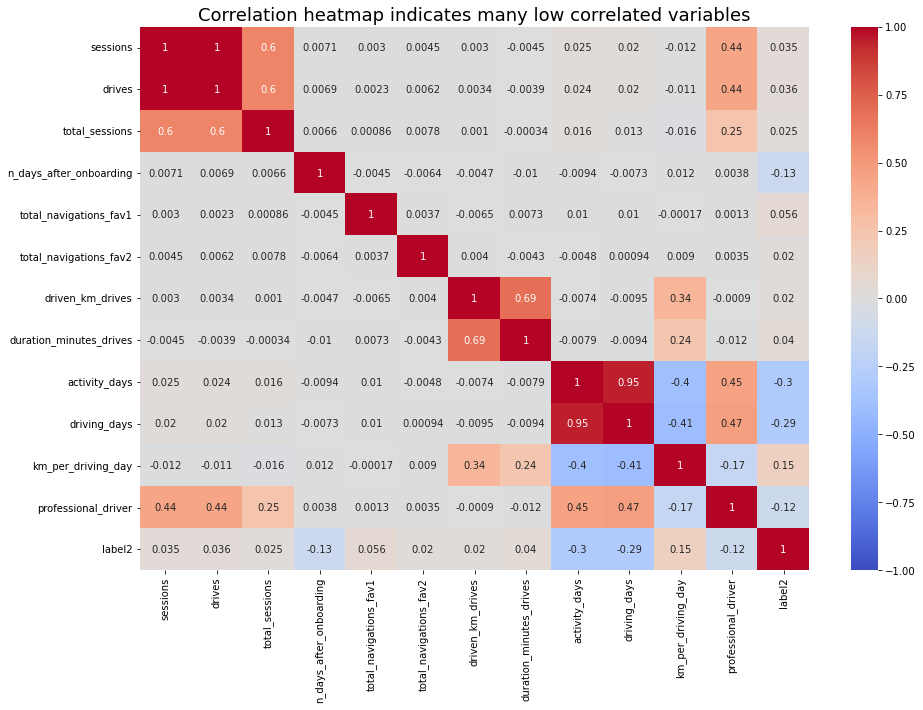

In [46]:
# Plot correlation heatmap
# Plot correlation heatmap
pt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
pt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
pt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Multicollinear variables:** 

- Driving days & Activity days
- Drives & Sessions

<br>
We should select one of them 
</br>

### **Create dummies (if necessary)**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [47]:
# Create new `device2` variable
df['device2'] = np.where((df['device'] =='iphone'), 1, 0)

We can train different model, one having device as the X variable and the other model set the sessions as the X variable

### **Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [48]:
df2=df

In [49]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [50]:
# Isolate target variable
y=df['label2']

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [51]:
# Perform the train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [54]:
model=LogisticRegression(penalty='none', max_iter=400).fit(X_train,y_train)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [55]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001904
total_sessions             0.000330
n_days_after_onboarding   -0.000405
total_navigations_fav1     0.001055
total_navigations_fav2     0.001144
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106069
km_per_driving_day         0.000018
professional_driver       -0.001512
device2                    0.000000
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [56]:
print("The model's intercept: ",model.intercept_)

The model's intercept:  [-0.00174951]


#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [57]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.94018687, 0.05981313],
       [0.62281594, 0.37718406],
       [0.76433377, 0.23566623],
       ...,
       [0.91918697, 0.08081303],
       [0.85047732, 0.14952268],
       [0.93425249, 0.06574751]])

In [58]:
print(model.predict_proba(X_test)[:,1]> 0.5)

[False False False ... False False False]


In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [59]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

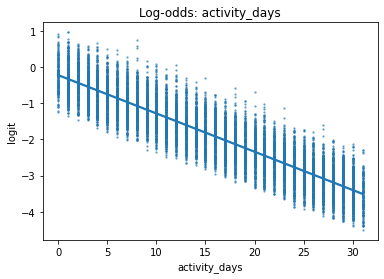

In [60]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
pt.title('Log-odds: activity_days');

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [61]:
# Generate predictions on X_test
y_predict=model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [62]:
# Score the model (accuracy) on the test data
print("Model Accuracy: ",model.score(X_test, y_test))

Model Accuracy:  0.8243356643356643


In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81826654 0.82292637 0.8387698  0.82013048 0.82929104 0.8358209
 0.81902985 0.82182836 0.81716418 0.83208955]


In [64]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8171641791044776, 0.8255317077241935, 0.8387698042870456)

### **Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

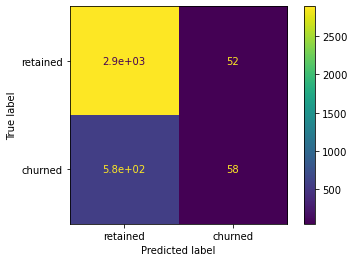

In [65]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [66]:
# Calculate precision manually
#precisoin is the true positive over the true and false positive: positive=churned
precision=cm[1,1]/(cm[1,1]+cm[0,1])
print('Model presision : ',precision)

Model presision :  0.5272727272727272


In [67]:
# Calculate recall manually
recall=cm[1,1]/(cm[1,1]+cm[1,0])
print('Model recall : ',recall)

Model recall :  0.0914826498422713


In [68]:
# Create a classification report
from sklearn.metrics import classification_report
target_names = ['Retained', 'Churned']
print(classification_report(y_test, y_predict, target_names=target_names))          

              precision    recall  f1-score   support

    Retained       0.83      0.98      0.90      2941
     Churned       0.53      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

**Negative class:** Retained
**Positive class:** Churned

<br>
This result needs further investigation
</br>

### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [81]:
# Create a list of (column_name, coefficient) tuples
#Columns name:
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
sorted_tuples = sorted(feature_importance,key=lambda x: x[1], reverse=True)
sorted_tuples

[('drives', 0.0019035066159294816),
 ('total_navigations_fav2', 0.0011443949050511707),
 ('total_navigations_fav1', 0.0010548023011012959),
 ('total_sessions', 0.0003301686321662718),
 ('duration_minutes_drives', 0.00010892176329469984),
 ('km_per_driving_day', 1.8480776693478863e-05),
 ('device2', 0.0),
 ('driven_km_drives', -1.4639449308668145e-05),
 ('n_days_after_onboarding', -0.00040532794672762406),
 ('professional_driver', -0.0015123248430276973),
 ('activity_days', -0.10606933834617575)]

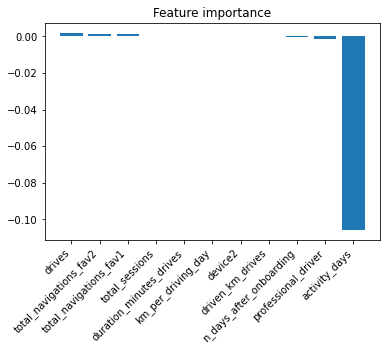

In [82]:
# Plot the feature importances
pt.bar(*zip(*sorted_tuples))
pt.xticks(rotation=45, ha='right')
pt.title('Feature importance');
pt.show()

This shows that drives is has the highest coeff value, and activity days has the least coeff value

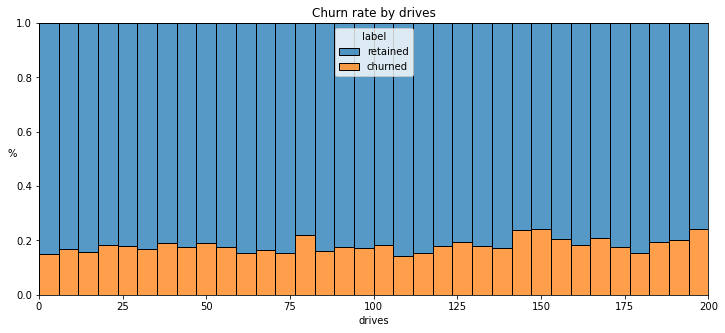

In [85]:
# Histogram
pt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='drives',
            # bins=range(0,1201,20), #this is to specify the range to get only users drove at most 1200 km
             hue='label',
             multiple='fill')
pt.ylabel('%', rotation=0)
pt.title('Churn rate by drives');

# Second model 

In [90]:
# Isolate predictor variables
S = df2.drop(columns = ['label', 'label2', 'device', 'drives', 'activity_days'])
# Isolate target variable
ys=df2['label2']
X_train, X_test, y_train, y_test = train_test_split(S, ys, stratify=ys, random_state=42)

model2=LogisticRegression(penalty='none', max_iter=400).fit(X_train,y_train)

# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

# Generate predictions on X_test
y_predict=model.predict(X_test)

# Score the model (accuracy) on the test data
print("Model Accuracy: ",model.score(X_test, y_test))


Model Accuracy:  0.8173426573426573


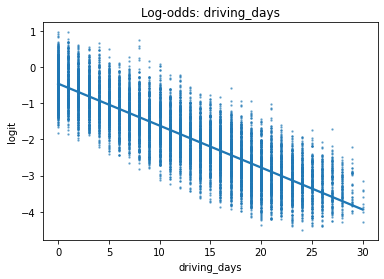

In [91]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='driving_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
pt.title('Log-odds: driving_days');

Uncertinity around the driving days variable is much larger than the activity days variable

In [92]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8171641791044776, 0.8255317077241935, 0.8387698042870456)

In [93]:
# Create a classification report
from sklearn.metrics import classification_report
target_names = ['Retained', 'Churned']
print(classification_report(y_test, y_predict, target_names=target_names))   

              precision    recall  f1-score   support

    Retained       0.84      0.96      0.90      2941
     Churned       0.45      0.15      0.22       634

    accuracy                           0.82      3575
   macro avg       0.65      0.55      0.56      3575
weighted avg       0.77      0.82      0.78      3575



In [94]:
pd.Series(model2.coef_[0], index=S.columns)

sessions                   0.001415
total_sessions             0.000140
n_days_after_onboarding   -0.000424
total_navigations_fav1     0.001001
total_navigations_fav2     0.001040
driven_km_drives          -0.000023
duration_minutes_drives    0.000101
driving_days              -0.122760
km_per_driving_day         0.000012
professional_driver       -0.002160
device2                    0.000000
dtype: float64

In [95]:
# Create a list of (column_name, coefficient) tuples
#Columns name:
feature_importance = list(zip(X_train.columns, model2.coef_[0]))

# Sort the list by coefficient value
sorted_tuples = sorted(feature_importance,key=lambda x: x[1], reverse=True)
sorted_tuples

[('sessions', 0.001414847366604675),
 ('total_navigations_fav2', 0.0010398270073566057),
 ('total_navigations_fav1', 0.0010013459347860297),
 ('total_sessions', 0.00013963934155566051),
 ('duration_minutes_drives', 0.00010086247328563763),
 ('km_per_driving_day', 1.2085748650019858e-05),
 ('device2', 0.0),
 ('driven_km_drives', -2.267154897834278e-05),
 ('n_days_after_onboarding', -0.00042351525858802866),
 ('professional_driver', -0.002160313740481812),
 ('driving_days', -0.12275982530669347)]

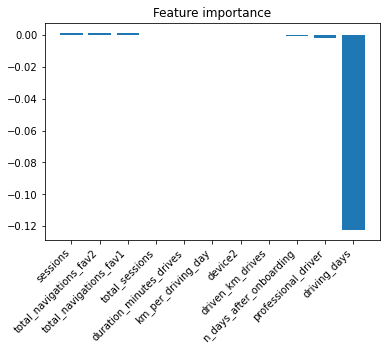

In [96]:
# Plot the feature importances
pt.bar(*zip(*sorted_tuples))
pt.xticks(rotation=45, ha='right')
pt.title('Feature importance');
pt.show()

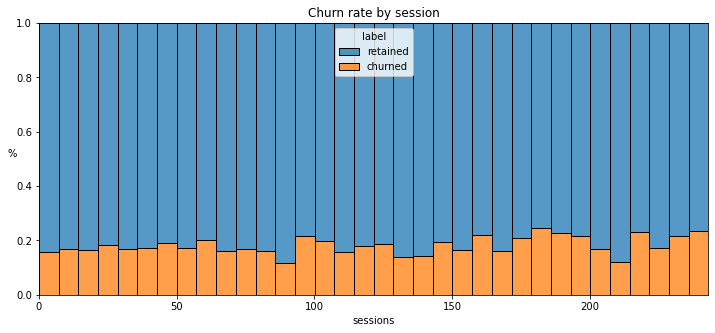

In [97]:
# Histogram
pt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='sessions',
            # bins=range(0,1201,20), #this is to specify the range to get only users drove at most 1200 km
             hue='label',
             multiple='fill')
pt.ylabel('%', rotation=0)
pt.title('Churn rate by session');

Both models result in almost similar accuracy, no much different in the model even when I changed the selection of the variables from drives to session and from activity days to driving days

### **Conclusion**


**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

<br>drives variable has  0.0019 coeff value</br>

2. Were there any variables that you expected to be stronger predictors than they were?

<br>The device type and driving days</br>

3. Why might a variable you thought to be important not be important in the model?

<br>The device variable has normal distribution of churn rate for both iphone and android users</br>

4. Would you recommend that Waze use this model? Why or why not?

<br>No, The model result in very low recall score, which does not help in predicting users who will churn</br>
5. What could you do to improve this model?

<br>Feature engineering, adding more data, trying different classification model</br>
6. What additional features would you like to have to help improve the model?

<br>Mabye the location, the age, whether if the user own a car or not? maybe some users used the app while they were renting a car</br>